<a href="https://colab.research.google.com/github/saritmaitra/Trading-strategy/blob/master/LSTM_DJI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pyforest
from pyforest import *
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
import pandas_datareader as web
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
plt.style.use('ggplot')


  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13715 sha256=cfad71355c2a417175ce260b8fa810b51b12de8a90686cfb5d4fe8e8d3cf919f
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dataset = web.DataReader('^DJI', data_source = 'yahoo', start = '2000-01-01')
print(dataset.head())
print('\n')
print(dataset.shape)

                    High           Low          Open         Close     Volume     Adj Close
Date                                                                                       
2000-01-03  11522.009766  11305.690430  11501.849609  11357.509766  169750000  11357.509766
2000-01-04  11350.059570  10986.450195  11349.750000  10997.929688  178420000  10997.929688
2000-01-05  11215.099609  10938.669922  10989.370117  11122.650391  203190000  11122.650391
2000-01-06  11313.450195  11098.450195  11113.370117  11253.259766  176550000  11253.259766
2000-01-07  11528.139648  11239.919922  11247.059570  11522.559570  184900000  11522.559570


(5158, 6)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5131 entries, 2000-01-03 to 2020-05-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5131 non-null   float64
 1   Low        5131 non-null   float64
 2   Open       5131 non-null   float64
 3   Close      5131 non-null   float64
 4   Volume     5131 non-null   int64  
 5   Adj Close  5131 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 280.6 KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

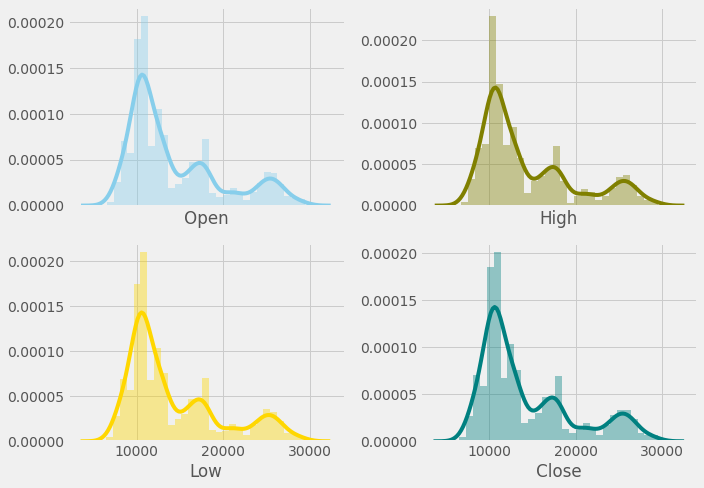

In [ ]:
plt.rcParams['figure.figsize'] = [15, 8]
plt.style.use('fivethirtyeight')

A = dataset[['Open', 
             'High', 
             'Low', 
             'Close']] # dataframe with open, high, low, close

print("\n")
f, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True)
sns.distplot( A["Open"] , color="skyblue", ax=axes[0, 0])
sns.distplot( A["High"] , color="olive", ax=axes[0, 1])
sns.distplot(A["Low"] , color="gold", ax=axes[1, 0])
sns.distplot( A["Close"] , color="teal", ax=axes[1, 1])
plt.tight_layout()
plt.show()

In [ ]:
dataset.index.name = 'date' # setting the index column as 'date'
print(dataset.head())
print('\n')
print(dataset.columns)
print('\n')
print(dataset.index)

                    High           Low          Open         Close     Volume     Adj Close
date                                                                                       
2000-01-03  11522.009766  11305.690430  11501.849609  11357.509766  169750000  11357.509766
2000-01-04  11350.059570  10986.450195  11349.750000  10997.929688  178420000  10997.929688
2000-01-05  11215.099609  10938.669922  10989.370117  11122.650391  203190000  11122.650391
2000-01-06  11313.450195  11098.450195  11113.370117  11253.259766  176550000  11253.259766
2000-01-07  11528.139648  11239.919922  11247.059570  11522.559570  184900000  11522.559570


Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14',
               ...
               '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05',

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

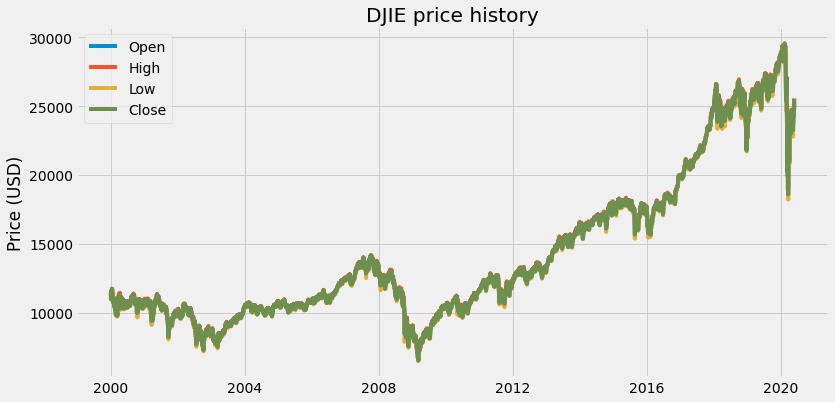

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(12,6))
plt.style.use('fivethirtyeight')
plt.plot(dataset["Open"])
plt.plot(dataset["High"])
plt.plot(dataset["Low"])
plt.plot(dataset["Close"])
plt.title('DJIE price history')
plt.ylabel('Price (USD)')
plt.legend(['Open','High','Low','Close'], loc='best')
plt.show()

In [ ]:
data = dataset.copy() 
# resetting index 
data.reset_index(inplace = True) 
# display 
print(data.head(20)) 

         date          High           Low          Open         Close     Volume     Adj Close
0  2000-01-03  11522.009766  11305.690430  11501.849609  11357.509766  169750000  11357.509766
1  2000-01-04  11350.059570  10986.450195  11349.750000  10997.929688  178420000  10997.929688
2  2000-01-05  11215.099609  10938.669922  10989.370117  11122.650391  203190000  11122.650391
3  2000-01-06  11313.450195  11098.450195  11113.370117  11253.259766  176550000  11253.259766
4  2000-01-07  11528.139648  11239.919922  11247.059570  11522.559570  184900000  11522.559570
5  2000-01-10  11638.280273  11532.480469  11532.480469  11572.200195  168180000  11572.200195
6  2000-01-11  11663.099609  11502.700195  11568.469727  11511.080078  177300000  11511.080078
7  2000-01-12  11612.530273  11505.179688  11506.730469  11551.099609  194060000  11551.099609
8  2000-01-13  11656.580078  11524.110352  11558.240234  11582.429688  174910000  11582.429688
9  2000-01-14  11750.280273  11612.530273  11619.3

In [ ]:
data.isna().any() # checking any missing values in data

date         False
High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

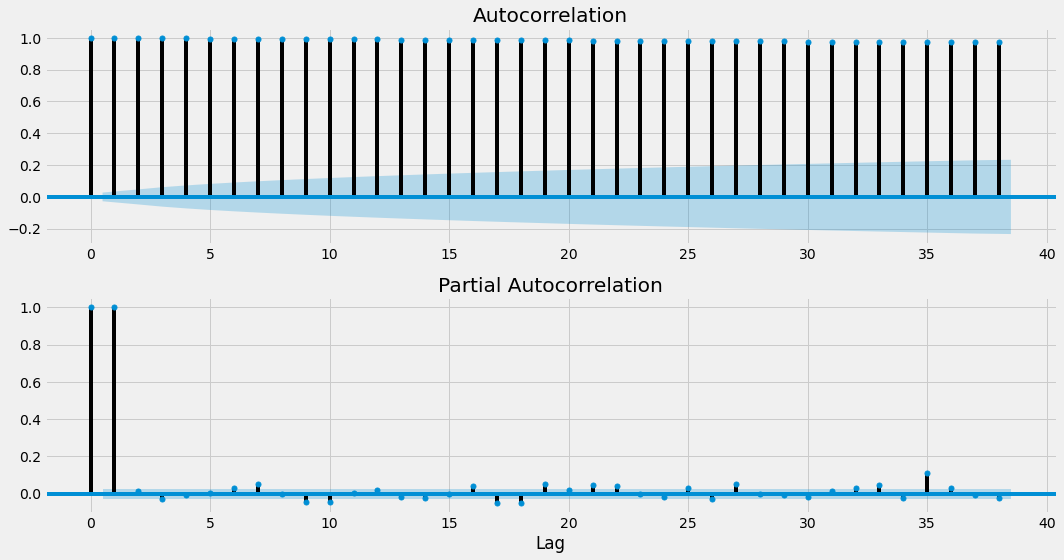

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure()
plt.subplot(211)
plot_acf(data['Open'], ax=plt.gca())
plt.subplot(212)
plot_pacf(data['Open'], ax=plt.gca())
plt.xlabel('Lag')
plt.tight_layout()
plt.show()

In [ ]:
A = dataset[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
A.tail()

,Open,High,Low,Close,Volume
date,,,,,
2020-06-08,27232.929688,27580.210938,27232.480469,27572.439453,430200000
2020-06-09,27447.369141,27447.369141,27151.060547,27272.300781,381430000
2020-06-10,27251.890625,27355.220703,26938.050781,26989.990234,448930000
2020-06-11,26282.509766,26294.080078,25082.720703,25128.169922,647780000
2020-06-12,25659.419922,25965.599609,25659.400391,25813.779297,101060211


In [ ]:
A = dataset[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
A['h_o'] = (A['High'] - A['Close'])/ A['Close'] *100
A['pct_chng'] = (A['Close'] - A['Open'])/ A['Open'] *100
df = A[['Close','h_o', 'pct_chng', 'Volume']]
df.tail()

,Close,h_o,pct_chng,Volume
date,,,,
2020-06-08,27572.439453,0.028186,1.246688,430200000
2020-06-09,27272.300781,0.641927,-0.637833,381430000
2020-06-10,26989.990234,1.353207,-0.961036,448930000
2020-06-11,25128.169922,4.639853,-4.392046,647780000
2020-06-12,25813.779297,0.588137,0.601570,101060211


In [ ]:
df.isnull()

,Close,h_o,pct_chng,Volume
date,,,,
2000-01-03,False,False,False,False
2000-01-04,False,False,False,False
2000-01-05,False,False,False,False
2000-01-06,False,False,False,False
2000-01-07,False,False,False,False
...,...,...,...,...
2020-05-20,False,False,False,False
2020-05-21,False,False,False,False
2020-05-22,False,False,False,False


In [ ]:
import math

Data = df.values # converting numpy array
tr_data = math.ceil(len(Data)*0.8)
te_data = len(df) - tr_data # remaining is test data
print(tr_data, te_data)

# split the actual dataframe in train/test set
train, test = df.iloc[0:tr_data], df.iloc[tr_data : len(df)]
print(train.shape, test.shape)

4116 1028
(4116, 4) (1028, 4)


In [ ]:
# Feature Scaling Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
training_data = scaler.fit_transform(train)
print(training_data)
print('\n')
print(training_data.shape)

[[0.40886703 0.14299956 0.34880977 0.22100462]
 [0.37830437 0.31611409 0.25023891 0.23288084]
 [0.38890506 0.0820629  0.4806596  0.26681095]
 ...
 [0.96735828 0.00344723 0.47665046 0.09229758]
 [0.94889468 0.11589951 0.35386694 0.10818733]
 [0.94969201 0.04328506 0.41868975 0.10979001]]


(4116, 4)


In [ ]:
training_data.shape[0]

4106

In [ ]:
# shaping data from neural network
X_train = []
y_train = []
for i in range(60, training_data.shape[0]): #training_data.shape[0] => 4106
  X_train.append(training_data[i-60:i])
  y_train.append(training_data[i,0])
  if i <= 61:
    print(X_train)
    print('\n')
    print(y_train)
    print()

import numpy as np
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)

#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 4))

[array([[0.40886703, 0.14299956, 0.34880977, 0.22100462],
       [0.37830437, 0.31611409, 0.25023891, 0.23288084],
       [0.38890506, 0.0820629 , 0.4806596 , 0.26681095],
       [0.40000626, 0.05280816, 0.48311415, 0.2303193 ],
       [0.42289551, 0.00478127, 0.54673675, 0.24175719],
       [0.42711473, 0.05637759, 0.43426177, 0.21885402],
       [0.4219198 , 0.13038728, 0.38935418, 0.23134666],
       [0.42532128, 0.05250659, 0.43646182, 0.25430462],
       [0.42798419, 0.06320707, 0.42704169, 0.22807282],
       [0.43993036, 0.02299182, 0.46351254, 0.35398545],
       [0.42613894, 0.13613081, 0.3436108 , 0.26274263],
       [0.42007373, 0.0733168 , 0.39460897, 0.25297591],
       [0.40833921, 0.18039142, 0.35122986, 0.25042806],
       [0.39987453, 0.11923939, 0.36667076, 0.27044094],
       [0.37917475, 0.32138089, 0.30010628, 0.26619454],
       [0.38102082, 0.04442465, 0.42504523, 0.27508459],
       [0.38128436, 0.08773283, 0.41932004, 0.24715423],
       [0.38086187, 0.12186436

In [ ]:
#X_train = np.array(X_train).astype('float32')
X_train = np.vectorize(X_train)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
#tf.enable_eager_execution ()


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
try:
  import tensorflow.compat.v2 as tf
except Exception:
  pass

tf.enable_v2_behavior()

print(tf.__version__)

2.2.0


In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 1.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: opt-einsum, grpcio, wrapt, wheel, astor, termcolor, keras-applications, absl-py, numpy, gast, six, protobuf, keras-preprocessing, google-pasta, tensorboard, tensorflow-estimator
Required-by: stable-baselines, magenta, fancyimpute


In [ ]:
!pip install --upgrade tensorflow

In [ ]:
from tensorboard.plugins.hparams import api as hp
#from tensorflow.compat.v2.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
#import numpy
from sklearn.model_selection import GridSearchCV

In [ ]:
# Function to create model, required for KerasClassifier
def build_model(optimizer='adam', init='uniform', dropout_rate=0.0, weight_constraint=0):
  #create model
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.LSTM(units = 6, activation = 'relu', 
                                 input_shape = X_train))
  model.add(tf.keras.layers.Dropout(dropout_rate))
  model.add(tf.keras.layers.LSTM(units = 6, activation = 'relu'))
  model.add(tf.keras.layers.Dropout(dropout_rate))
  model.add(tf.keras.layers.LSTM(units = 6, activation = 'relu'))
  model.add(tf.keras.layers.Dropout(dropout_rate))
  model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
  #model.summary()

  #optimizer = tf.keras.optimizers.RMSprop(0.001)

  # Compile model
  model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
  return model

In [ ]:
#X_train = X_train.reshape(X_train.shape[0], 5)
#X_train = X_train.astype('float32')


In [ ]:
from time import time

In [ ]:
pip uninstall tensorflow_estimator

Uninstalling tensorflow-estimator-2.1.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/tensorflow_estimator-2.1.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_estimator/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-estimator-2.1.0


In [ ]:
pip install tensorflow_estimator

  Using cached https://files.pythonhosted.org/packages/18/90/b77c328a1304437ab1310b463e533fa7689f4bfc41549593056d812fab8e/tensorflow_estimator-2.1.0-py2.py3-none-any.whl


In [ ]:
#model = build_model()
#model.summary()
start=time()
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# create model
model = KerasRegressor(build_fn=build_model)
# define the grid search parameters
batches = np.array([20, 30, 60, 100, 150])
epochs = np.array([50, 100, 150])
activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid']
optimizers = ['RMSprop', 'Adam', 'SGD', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam' ]
init = ['glorot_uniform', 'normal', 'uniform', 'lecun_uniform', 'glorot_normal', 'he_normal', 'he_unform']
weight_constraint = [1, 2, 3, 4, 5]
neurons = [1,5,10,15, 20,25,30]
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(optimizer=optimizers, nb_epoch=epochs, batch_size=batches, init=init,
                  dropout_rate = dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))
print("total time:",time()-start)

TypeError: ignored

##**LSTM network**

At their very essence, neural networks perform representation learning, where each layer of the neural network learns a representation from the previous layer. Neural networks have an input layer, one or many hidden layers, and an output layer. The number of hidden layers defines just how deep the neural network is. You can view these hidden layers as intermediate computations; these hidden layers together allow the entire neural network to perform complex function approximation.

Each layer has a certain number of nodes (also known as neurons or units) that comprise the layer. The nodes of each layer are then connected to the nodes of the next layer. During the training process, the neural network determines the optimal weights to assign to each node.

In addition to adding more layers, we can add more nodes to a neural network to increase the capacity of the neural network to model complex relationships. These nodes are fed into an activation function, which determines what value of the current layer is fed into the next layer of the neural network. Common activation functions include linear, sigmoid, hyperbolic tangent, and rectified linear unit (ReLU) activation functions.

Neural networks may also have bias nodes; these nodes are always constant values and, unlike the normal nodes, are not connected to the previous layer. Rather, they allow the input of an activation function to be shifted lower or higher. With the hidden layers—including the nodes, bias nodes, and activation functions—the neural network is trying to learn the right function approximation to use to map the input layer to the output layer.

In the case of supervised learning problems, this is pretty straightforward. The input layer represents the features that are fed into the neural network, and the output layer represents the label assigned to each observation. During the training process, the neural network determines which weights across the neural network help minimize the error between its predicted label for each observation and the true label.

Neural networks are incredibly powerful and are capable of modeling complex nonlinear relationships to a degree that classicial machine learning algorithms struggle with. In general, this is a great characteristic of neural networks, but there is a potential risk. Because neural networks can model such complex nonlinear relationships, they are also much more prone to overfitting, which we should be aware of and address when designing machine learning applications using neural networks.

We also must perform a lot more hyperparameter optimization to get neural networks to perform well—including the choice of the cost function, the algorithm to minimize the loss, the type of initialization for the starting weights, the number of iterations to use to train the neural network (i.e., number of epochs), the number of observations to feed in before each weight update (i.e., batch size), and the step size to move the weights in (i.e., learning rate) during the training process.

In [ ]:
from keras.models import Sequential, Model

Using TensorFlow backend.


The beauty of TensorFlow is that users can define a neural network—or, more generally, a graph of computations—in Python, and can take the neural network and run it using C++ code, which is much faster than Python.

TensorFlow is also able to parallelize the computations, breaking down the entire series of operations into separate chunks and running them in parallel across multiple CPUs and GPUs. Performance like this is a very important consideration for large-scale machine learning applications like those that Google runs for its core operations such as search.

we construct the computation graph, defining b, x, and y. Then, we execute the graph by calling tf.Session()

Instead of a single hidden layer with 6 nodes, we will use one hidden layer with 28 nodes and another with 27 nodes. This is only a slight variation from the one we used previously. This is now a three-layer neural network since we have two hidden layers plus the output layer. The input layer does not “count” toward this number.

We will use a dropout percentage of 10%, which we will apply to the hidden layer. In other words, 10% of the neurons are dropped. The higher the dropout percentage, the stronger the regularization. Dropout help reduce the overfitting, improving the results modestly.

In [ ]:
X_train.shape[1], 4

(60, 4)

In [ ]:
# Call neural network API
regressor = tf.keras.Sequential()

regressor.add(tf.keras.layers.LSTM(units = 10, 
                                   activation = 'relu', 
                                   return_sequences = True, 
                                   input_shape = (X_train.shape[1], 4))) #X_train.shape[1], 4 -> (60, 4)
regressor.add(tf.keras.layers.Dropout(0.1))
regressor.add(tf.keras.layers.LSTM(units = 20, activation='relu', return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.2))
regressor.add(tf.keras.layers.LSTM(units = 30, activation='relu'))
regressor.add(tf.keras.layers.Dropout(0.3))
regressor.add(tf.keras.layers.Dense(units = 1))

regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 10)            600       
_________________________________________________________________
dropout (Dropout)            (None, 60, 10)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 20)            2480      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 20)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                6120      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [ ]:
# Compile the model
regressor.compile(optimizer='adam',
              loss='mean_squared_error')

# Train the model
num_epochs = 10
batch_size = 32

h1 = regressor.fit(X_train, y_train, 
                   epochs = num_epochs, 
                   batch_size = batch_size)

Epoch 1/10
127/127 [==============================] - 49s 387ms/step - loss: 0.0501
Epoch 2/10
127/127 [==============================] - 48s 378ms/step - loss: 0.0123
Epoch 3/10
127/127 [==============================] - 49s 384ms/step - loss: 0.0094
Epoch 4/10
127/127 [==============================] - 49s 384ms/step - loss: 0.0078
Epoch 5/10
127/127 [==============================] - 50s 391ms/step - loss: 0.0071
Epoch 6/10
127/127 [==============================] - 49s 384ms/step - loss: 0.0072
Epoch 7/10
127/127 [==============================] - 48s 381ms/step - loss: 0.0061
Epoch 8/10
127/127 [==============================] - 50s 394ms/step - loss: 0.0056
Epoch 9/10
127/127 [==============================] - 51s 399ms/step - loss: 0.0049
Epoch 10/10
127/127 [==============================] - 48s 380ms/step - loss: 0.0046


In [ ]:
last_60_days = train.tail(60) # look back 60 days
df = last_60_days.append(test)
df.head()

,Close,h_o,pct_chng,Volume
date,,,,
2016-02-18,16413.429688,0.599571,-0.426663,104950000
2016-02-19,16391.990234,0.115732,-0.115598,134340000
2016-02-22,16620.660156,0.262204,1.239737,102240000
2016-02-23,16431.779297,1.086987,-1.075299,98170000
2016-02-24,16484.990234,0.135884,0.402893,93620000


In [ ]:
input = scaler.transform(df)
input

array([[0.83859703, 0.05919602, 0.39306346, 0.13224114],
       [0.83677478, 0.01142625, 0.40968349, 0.17249976],
       [0.85621067, 0.02588759, 0.48209827, 0.12852896],
       ...,
       [1.73755616, 0.13360299, 0.36451223, 0.60342726],
       [1.57930998, 0.45809562, 0.18119532, 0.87581332],
       [1.63758363, 0.05806711, 0.44800135, 0.12691288]])

In [ ]:
# shaping data from neural network
X_test = []
y_test = []
for i in range(60, input.shape[0]):
  X_test.append(input[i-60:i])
  y_test.append(input[i,0])

X_test, y_test= np.array(X_test), np.array(y_test)
print(X_test.shape, y_test.shape)

(1028, 60, 4) (1028,)


In [ ]:
y_pred = regressor.predict(X_test, verbose=1)

33/33 [==============================] - 1s 28ms/step


In [ ]:
scaler.scale_

array([8.49954128e-05, 9.87306306e-02, 5.34294282e-02, 1.36980672e-09])

In [ ]:
scale = 1/ 8.49954128e-05
scale

11765.340823193224

In [ ]:
y_pred = y_pred * scale
y_test = y_test * scale

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

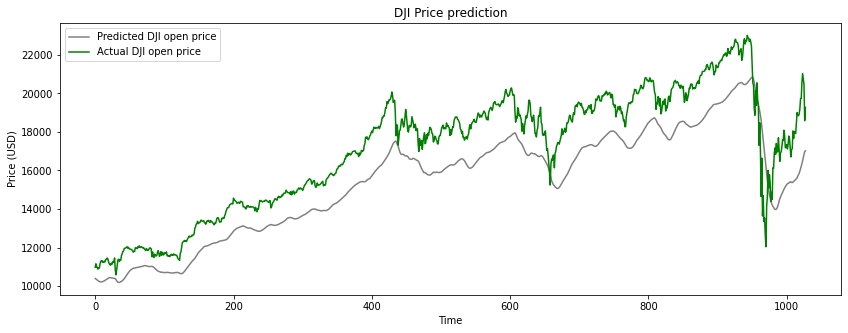

In [ ]:
plt.figure(figsize = (14,5))
plt.plot(y_pred, color = 'gray', label = 'Predicted DJI open price')
plt.plot(y_test, color = 'green', label = 'Actual DJI open price')
plt.title ('DJI Price prediction')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [ ]:
mean_y_test = y_test.mean()
mean_y_pred = y_pred.mean()
print(mean_y_test, mean_y_pred)

17039.34022790746 15402.258


In [ ]:
accuracy = (mean_y_test / mean_y_pred)*100
accuracy

110.62884698682849

In [ ]:
rms = np.sqrt(np.mean(np.power((y_test, y_pred),2)))
rms

ValueError: ignored

In [ ]:
from sklearn.model_selection import StratifiedKFold

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, y):
  # create model
	regressor = tf.keras.Sequential()
  regressor.add(tf.keras.layers.LSTM(units = 10, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 4)))
  regressor.add(tf.keras.layers.Dropout(0.1))
  regressor.add(tf.keras.layers.LSTM(units = 20, activation='relu', return_sequences = True))
  regressor.add(tf.keras.layers.Dropout(0.2))
  regressor.add(tf.keras.layers.LSTM(units = 30, activation='relu', return_sequences = True))
  regressor.add(tf.keras.layers.Dropout(0.3))
  regressor.add(tf.keras.layers.LSTM(units = 40, activation='relu'))
  regressor.add(tf.keras.layers.Dropout(0.4))
  regressor.add(tf.keras.layers.Dense(units = 1))
	# Compile the model
  regressor.compile(optimizer='adam',
              loss='mean_squared_error')

  # Train the model
  num_epochs = 10
  batch_size = 32
  regressor.fit(X_train, y_train, 
                   epochs = num_epochs, 
                   batch_size = batch_size)
	# evaluate the model
	scores = model.evaluate(X_test, y_test, verbose=0)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

IndentationError: ignored

In [ ]:
testing_data = data_test.drop(['date'], axis=1)
testing_data.tail()

dataset_total = pd.concat((training_data, testing_data), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [ ]:
def create_model():
  #create model
  regressor = tf.keras.Sequential()
  regressor.add(tf.keras.layers.LSTM(units = 6, 
                                   activation = 'linear', 
                                   return_sequences = True, 
                                   input_shape = (X_train.shape[1], 6)))
  regressor.add(tf.keras.layers.Dropout(0.2))
  regressor.add(tf.keras.layers.LSTM(units = 6,return_sequences = True))
  regressor.add(tf.keras.layers.Dropout(0.2))
  regressor.add(tf.keras.layers.LSTM(units = 6, return_sequences = True))
  regressor.add(tf.keras.layers.Dropout(0.2))

regressor.add(tf.keras.layers.LSTM(units = 6, return_sequences = False))
regressor.add(tf.keras.layers.Dropout(0.2))
regressor.add(tf.keras.layers.Dense(units = 6))
regressor.add(tf.keras.layers.Dense(units = 1))

regressor.summary()

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

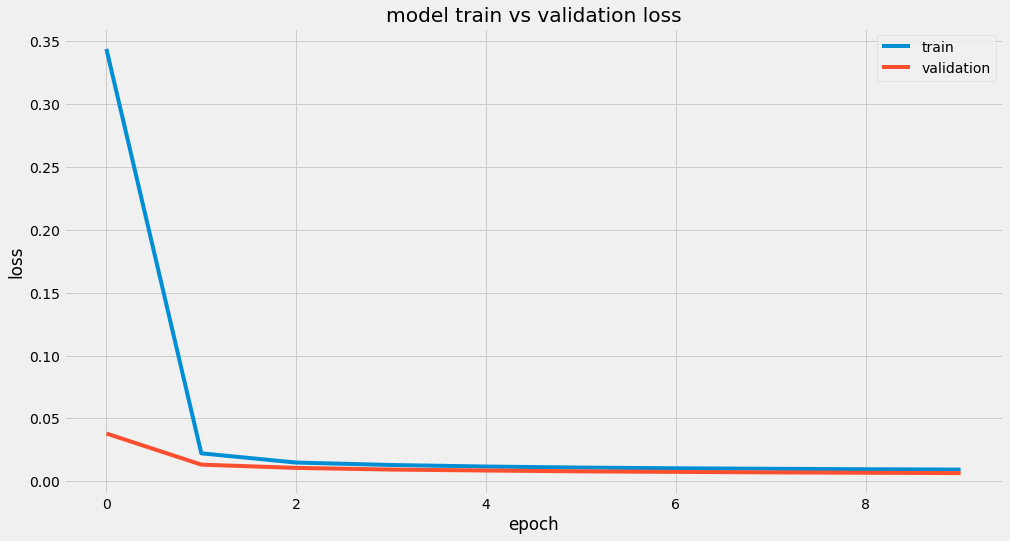

In [ ]:
plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss'])
plt.title('model training  vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 4))

As always, experimentation is required to find the optimal solution. Change the number of nodes, the number of hidden layers, and the mix of activation functions, and see how much better or worse the solutions become. This type of experimentation is known as hyperparameter optimization. You are adjusting the hyperparameters—the number of nodes, the number of layers, and the mix of activation functions—in search of the optimal solution.

In [ ]:
predicted_stock_price = scaler.inverse_transform(y_pred)
predicted_stock_price

ValueError: ignored

In [ ]:
y_pred.tolist()

In [ ]:
scaler.scale_

array([4.62599946e-05, 9.87306306e-02, 5.34294282e-02, 4.58211144e-10])

In [ ]:
scale = 1/4.62599946e-05
scale

21616.950210365998

In [ ]:
y_pred = y_pred[-1] * scale
#y_pred.tolist()

In [ ]:
print(y_pred)

[[  7251.0933]
 [  7994.249 ]
 [  8875.157 ]
 [  9931.668 ]
 [ 11061.492 ]
 [ 12289.284 ]
 [ 13401.665 ]
 [ 14445.996 ]
 [ 15467.635 ]
 [ 16131.746 ]
 [ 16647.355 ]
 [ 16816.031 ]
 [ 16693.531 ]
 [ 16356.2   ]
 [ 16094.692 ]
 [ 15749.748 ]
 [ 15314.    ]
 [ 15001.433 ]
 [ 14740.442 ]
 [ 14650.263 ]
 [ 14669.502 ]
 [ 14843.151 ]
 [ 15113.3955]
 [ 15414.23  ]
 [ 15717.    ]
 [ 16081.771 ]
 [ 16496.81  ]
 [ 16925.84  ]
 [ 17296.193 ]
 [ 17544.896 ]
 [ 17751.17  ]
 [ 17805.072 ]
 [ 17773.275 ]
 [ 17742.758 ]
 [ 17534.32  ]
 [ 17347.605 ]
 [ 17210.904 ]
 [ 17068.781 ]
 [ 17090.535 ]
 [ 17174.201 ]
 [ 17229.398 ]
 [ 17544.334 ]
 [ 17481.197 ]
 [ 16791.42  ]
 [ 15564.34  ]
 [ 14169.564 ]
 [ 13578.162 ]
 [ 13672.826 ]
 [ 20875.248 ]
 [ 33062.113 ]
 [ 39916.594 ]
 [ 37479.05  ]
 [ 32785.383 ]
 [ 28700.309 ]
 [ 25232.242 ]
 [ 22214.041 ]
 [488332.16  ]
 [528858.7   ]
 [572560.7   ]
 [619555.9   ]]


In [ ]:
y_test = y_test * scale
y_test 

array([21102.72950688, 21130.73927253, 21468.01075714, 21362.54981956,
       21334.67091329, 21364.25099144, 21585.00099159, 21588.33106972,
       21688.84083542, 21720.11036669, 21692.22950729, 21829.91114801,
       21908.04005432, 22004.47950751, 21968.39942936, 22074.34083568,
       22098.20997633, 21915.09083557, 21991.38966375, 22321.75099211,
       22087.83107007, 22156.33107012, 22036.62989816, 22198.04005452,
       22409.85060154, 22276.71974208, 22360.00099213, 22392.62013278,
       22483.17091409, 22750.59083616, 22801.04982057, 22648.98927358,
       22639.21974233, 22613.04005481, 22442.68067969, 21988.75099187,
       22175.79982013, 22187.39942951, 22312.38966398, 21708.97950731,
       21852.76075741, 22260.58107019, 22743.79982053, 22832.71974246,
       22555.45997664, 22729.77052364, 22729.29005489, 23004.37013321,
       22876.26075812, 22851.03028935, 22685.13966423, 22800.97950807,
       22672.93067985, 22445.36036719, 21413.75099147, 20534.30958461,
      

In [ ]:
mean_y_test = y_test.mean()
mean_y_pred = y_pred.mean()
print(mean_y_test, mean_y_pred)

19339.682581827044 21297.21


In [ ]:
accuracy = (mean_y_test / mean_y_pred)*100
accuracy

90.80852248016123

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ValueError: ignored

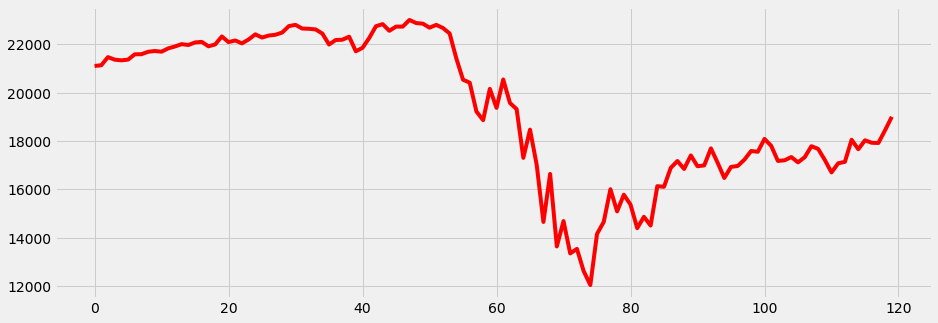

In [ ]:
plt.figure(figsize = (14,5))
plt.plot(y_test, color = 'red', label = 'Actual DJI open price')
plt.plot(y_pred, color = 'blue', label = 'Predicted DJI open price')
plt.title ('DJI Price prediction')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

Each row in the dataset contains the price of the DJI at t+1 and the constituent’s prices at T=t. 

The idea is to build a model to predict financial market’s movements. The forecasting algorithm aims to foresee whether tomorrow’s  open price is going to be lower or higher with respect to today.

#### Problem statement
The problem considered here are-

- Regression Predictive Modeling Problem (trying to forecast exact open price or return next day
- Binary classification problem (price will go up [1; 0] or down [0; 1]).

#### Feature engineerig
I have created the following 9 input features considering High, Low, Open, Close columns in the dataset:

1. open
2. close
3. high
4. low
5. volume
6. daily_return
7. cum_daily_return
8. H-L
9. C-O
9. 10day MA
11. 50day MA
12. 200day MA
13. ema_26
14. ema_12
15. rsi
16. Wiliams%R
17. macd
18. bb_high
19. bb_low
20. momentum

So, I will use the problem statement to define a problem that has above defined 9 input features; some of these features will be relevant and some will not be relevant in due course.

In [ ]:
import copy
DATA = df
tek_ind = copy.deepcopy(DATA)

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2020-01-03 12:05:27--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-01-03 12:05:28--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-01-03 12:05:28--  https://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving phoenixnap

In [ ]:
from talib import RSI, BBANDS

tek_ind['daily_return'] = tek_ind.close.pct_change()
tek_ind['cum_daily_return'] = (1 + tek_ind['daily_return']).cumprod()
tek_ind['H-L'] = tek_ind.high - DATA.low
tek_ind ['C-O'] = tek_ind.close - tek_ind.open

#simple moving average
tek_ind['10day MA'] = tek_ind.close.shift(1).rolling(window = 10).mean()
tek_ind['50day MA'] = tek_ind.close.shift(1).rolling(window = 50).mean()
tek_ind['100day MA'] = tek_ind.close.shift(1).rolling(window = 100).mean()
tek_ind['200day MA'] = tek_ind.close.shift(1).rolling(window = 200).mean()

# rsi 
tek_ind['rsi'] = talib.RSI(tek_ind.close.values, timeperiod = 14)

# roc
tek_ind['ROC'] = ((tek_ind['close'] - tek_ind['close'].shift(12)) / 
                    (tek_ind['close'].shift(12)))*100

#williams %R
tek_ind['Williams %R'] = talib.WILLR(tek_ind.high.values, 
                                     tek_ind.low.values, 
                                     tek_ind.close.values, 14)
    
# exponential moving average
tek_ind['ema_10'] = tek_ind.close.ewm(span=10).mean()
tek_ind['ema_50'] = tek_ind.close.ewm(span=50).mean()
tek_ind['ema_100'] = tek_ind.close.ewm(span=100).mean()
tek_ind['ema_200'] = tek_ind.close.ewm(span=200).mean()

In [ ]:
# force index
#Force Index = {Close (current period)  -  Close (prior period)} x Volume
#tek_ind['FI'] = tek_ind['close'].diff() * tek_ind['volume']

#Stochastic %K
tek_ind['SO%K'] = ((tek_ind['close'] - tek_ind['low']) / 
                   (tek_ind['high'] - tek_ind['low']))

# cci
tek_ind["CCI"] = talib.CCI(tek_ind.high, tek_ind.low, 
                           tek_ind.close, timeperiod=20)

#macd
ema_26 = tek_ind.close.ewm(span=26).mean().fillna(0)
ema_12 = tek_ind.close.ewm(span=12).mean().fillna(0)
tek_ind['macd'] = (ema_12 - ema_26)

#Average Directional Index (ADX)
tek_ind['ADX'] = talib.ADX(tek_ind.high, tek_ind.low, tek_ind.close, timeperiod=14)


In [ ]:
# Creating Bollinger Bands
#Set number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
window = 21
no_of_std = 2
#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = tek_ind.close.rolling(window).mean()
rolling_std = tek_ind.close.rolling(window).std()
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
#B['Rolling Mean'] = rolling_mean.fillna(0)
tek_ind['bb_high'] = (rolling_mean + (rolling_std * no_of_std)).fillna(0)
tek_ind['bb_low'] = (rolling_mean - (rolling_std * no_of_std)).fillna(0)
    
    
# Create Momentum
tek_ind['momentum'] = tek_ind.close - 1

tek_ind.head()

,open,close,high,low,volume,daily_return,cum_daily_return,H-L,C-O,10day MA,50day MA,100day MA,200day MA,rsi,ROC,Williams %R,ema_10,ema_50,ema_100,ema_200,SO%K,FI,CCI,macd,ADX,bb_high,bb_low,momentum
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-02,28639.00,28868.80,28872.80,28627.77,251822708,NaN,NaN,245.03,229.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28868.800000,28868.800000,28868.800000,28868.800000,0.983675,NaN,NaN,0.000000,NaN,0.0,0.0,28867.80
2019-12-31,28414.60,28538.44,28547.35,28376.49,193341784,-0.011443,0.988557,170.86,123.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28687.102000,28700.316400,28701.968200,28702.794100,0.947852,-6.387239e+10,NaN,-7.411923,NaN,0.0,0.0,28537.44
2019-12-30,28654.76,28462.14,28664.69,28428.98,185068232,-0.002674,0.985914,235.71,-192.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28596.668771,28617.727836,28620.421336,28621.772556,0.140681,-1.412071e+10,NaN,-11.810320,NaN,0.0,0.0,28461.14
2019-12-27,28675.34,28645.26,28701.66,28608.98,184932114,0.006434,0.992257,92.68,-30.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28612.677416,28625.029254,28626.818521,28627.732787,0.391454,3.386477e+10,NaN,-6.909878,NaN,0.0,0.0,28644.26
2019-12-26,28539.46,28621.39,28624.10,28535.15,155972128,-0.000833,0.991430,88.95,81.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28615.178562,28624.242035,28625.688959,28626.438732,0.969533,-3.723055e+09,NaN,-5.051423,NaN,0.0,0.0,28620.39


In [ ]:
t = tek_ind.fillna(0) # filling NaN with 'zero'
t.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12664 entries, 2020-01-02 to 1970-01-02
Data columns (total 28 columns):
open                12664 non-null float64
close               12664 non-null float64
high                12664 non-null float64
low                 12664 non-null float64
volume              12664 non-null int64
daily_return        12664 non-null float64
cum_daily_return    12664 non-null float64
H-L                 12664 non-null float64
C-O                 12664 non-null float64
10day MA            12664 non-null float64
50day MA            12664 non-null float64
100day MA           12664 non-null float64
200day MA           12664 non-null float64
rsi                 12664 non-null float64
ROC                 12664 non-null float64
Williams %R         12664 non-null float64
ema_10              12664 non-null float64
ema_50              12664 non-null float64
ema_100             12664 non-null float64
ema_200             12664 non-null float64
SO%K            

### empirical quantile of daily returns

In [ ]:
import scipy.stats

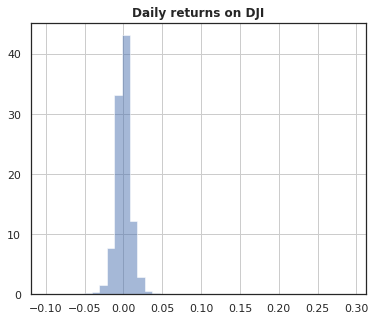

In [ ]:
plt.figure(figsize=(6,5))
mean = t['daily_return'].mean()
sigma = t['daily_return'].std()
tdf, tmean, tsigma = scipy.stats.t.fit(t['daily_return'])
t['daily_return'].hist(bins=40, density=True, histtype="stepfilled", alpha=0.5)
plt.title('Daily returns on DJI', weight = 'bold')
plt.show()


In [ ]:
t["daily_return"].quantile(0.05)

-0.015692256783901737

##### The 0.05 (p=0.05) empirical quantile of daily returns is at **-0.0156**. This means that with 95% confidence, the worst daily loss will not exceed **1.56%** (of the investment).

**As an example, if you have a €1M investment, your one-day 5% VaR is 0.0156 * €1M = €15.6k** 

Now, the goal here is to predict (t+1) value based on N previous days information. Therefore, defining the output value as price rise, which is a binary variable storing 1 when the closing price of tomorrow > today.

This will be a classification variable, if the average price will go either up or down the next day. The target will be forecasting the difference between today’s price and tomorrow’s price (which is unkonwn).

In [ ]:
t['price_rise'] = np.where(t['open'].shift(-1) > t['open'], 1, 0)
print(t.head())

                open     close      high       low     volume  cum_daily_return     H-L  10day MA  50day MA  100day MA  200day MA  Williams %R  \
date                                                                                                                                             
2020-01-02  28639.00  28868.80  28872.80  28627.77  251822708          0.000000  245.03       0.0       0.0        0.0        0.0          0.0   
2019-12-31  28414.60  28538.44  28547.35  28376.49  193341784          0.988557  170.86       0.0       0.0        0.0        0.0          0.0   
2019-12-30  28654.76  28462.14  28664.69  28428.98  185068232          0.985914  235.71       0.0       0.0        0.0        0.0          0.0   
2019-12-27  28675.34  28645.26  28701.66  28608.98  184932114          0.992257   92.68       0.0       0.0        0.0        0.0          0.0   
2019-12-26  28539.46  28621.39  28624.10  28535.15  155972128          0.991430   88.95       0.0       0.0        0.0      

### correlation of features

In [ ]:
import seaborn as sns

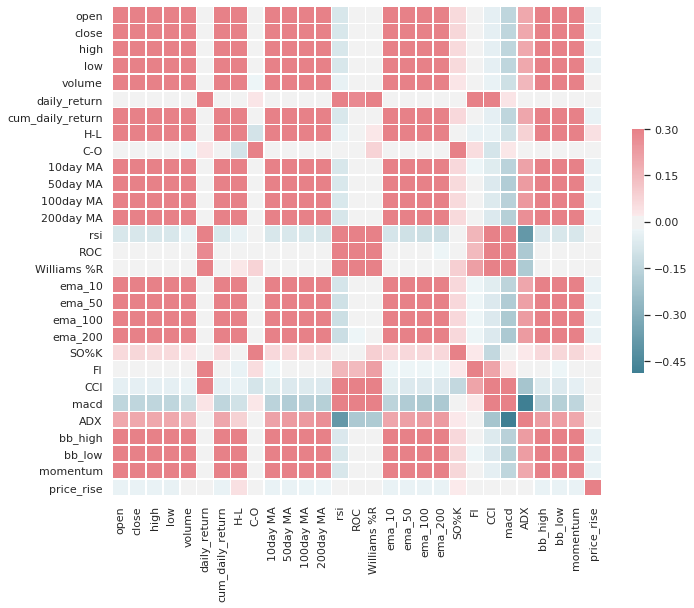

In [ ]:
sns.set(style="white")

# Compute the correlation matrix
corr =t.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

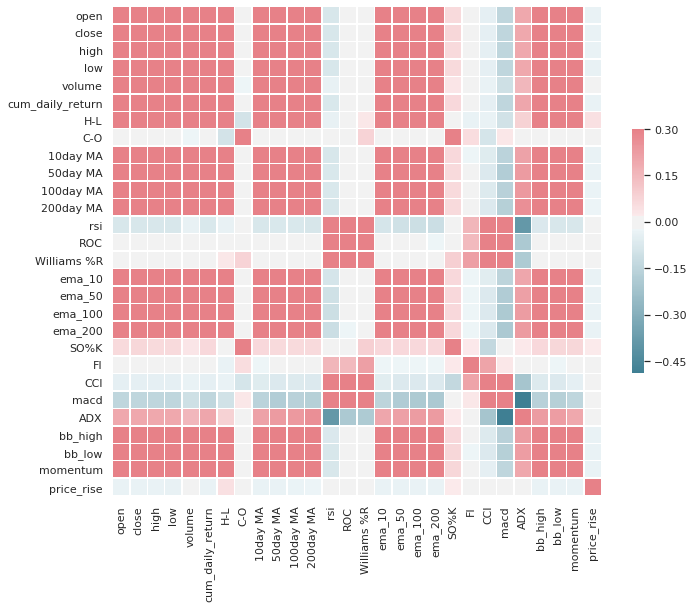

In [ ]:
t = t.drop(['daily_return' ], axis=1)
sns.set(style="white")
# Compute the correlation matrix
corr =t.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

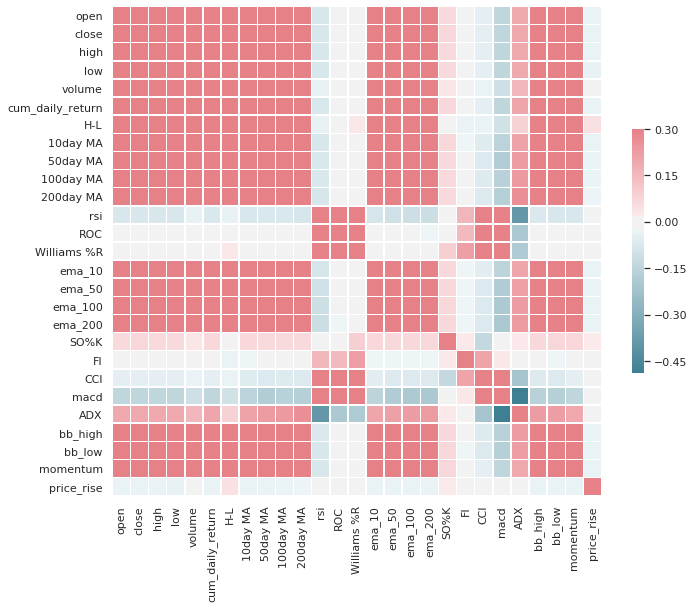

In [ ]:
t = t.drop(['C-O' ], axis=1)
sns.set(style="white")
# Compute the correlation matrix
corr =t.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

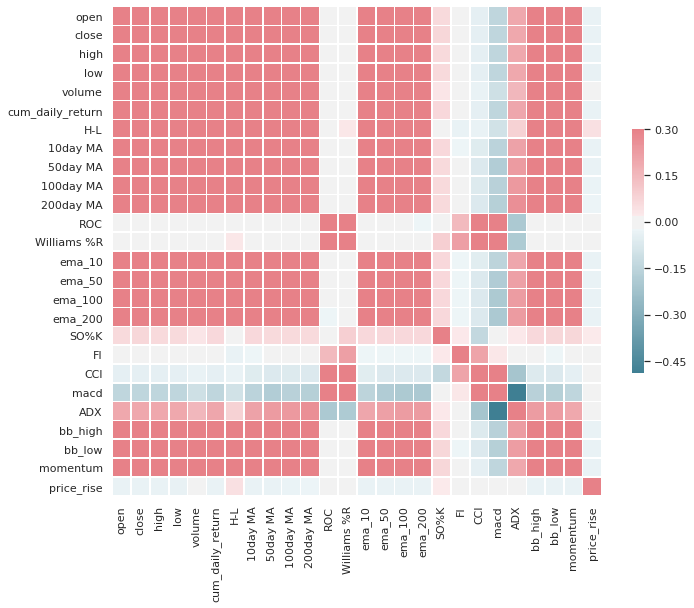

In [ ]:
t = t.drop(['rsi' ], axis=1)
sns.set(style="white")
# Compute the correlation matrix
corr =t.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

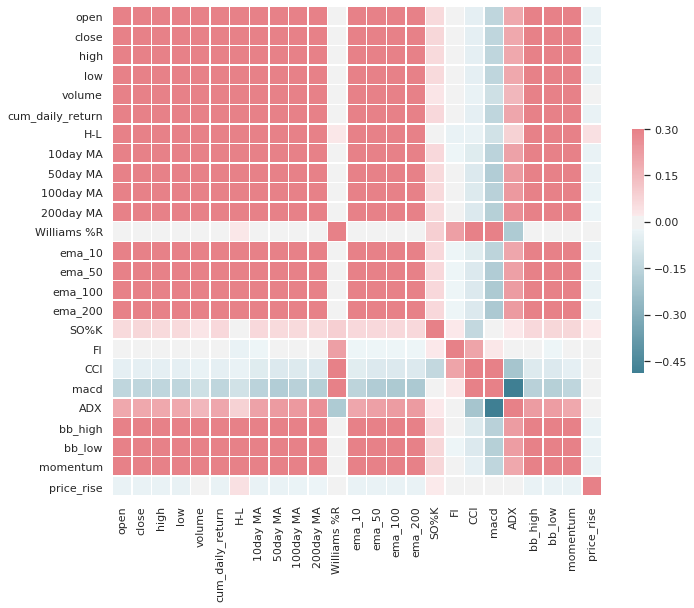

In [ ]:
t = t.drop(['ROC' ], axis=1)
sns.set(style="white")
# Compute the correlation matrix
corr =t.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
t['price_rise'].value_counts()

0    6516
1    5895
Name: price_rise, dtype: int64

In [ ]:
t['price_rise'].unique()

array([1, 0])

### Data Quality Checks:

In [ ]:
# Check the statistics of the columns of the merged dataframe and check for outliers
print(t.describe())

               open         close          high           low        volume           H-L      10day MA      50day MA     100day MA     200day MA  \
count  12411.000000  12411.000000  12411.000000  12411.000000  1.241100e+04  12411.000000  12411.000000  12411.000000  12411.000000  12411.000000   
mean    6809.533746   6811.150922   6855.512997   6762.519210  9.515726e+07     92.993786   6822.359565   6862.795971   6913.514983   7017.205001   
std     6355.259488   6356.246416   6385.548728   6323.293928  1.165291e+08     99.757694   6366.562343   6405.322212   6453.548785   6552.790475   
min      577.600000    577.600000    587.140000    570.010000  6.664630e+05      2.900000    590.504000    620.603200    634.222400    691.928300   
25%      996.585000    996.675000   1006.310000    988.755000  5.766166e+06     19.525000    997.399500    991.958400    988.640950    979.636475   
50%     3814.830000   3814.920000   3845.850000   3779.930000  2.950581e+07     61.630000   3824.514000   

In [ ]:
print('Total dataset has {} samples, and {} features.'.format(t.shape[0], t.shape[1]))

Total dataset has 12411 samples, and 18 features.


In [ ]:
df = wtd.historical('^DJI',order='oldest')
print(df.head())

                open     close      high       low     volume
2020-01-03  28553.30  28634.88  28716.30  28500.40  239591369
2020-01-02  28638.97  28868.80  28872.80  28627.77  254294036
2019-12-31  28414.60  28538.44  28547.35  28376.49  193341784
2019-12-30  28654.76  28462.14  28664.69  28428.98  185068232
2019-12-27  28675.34  28645.26  28701.66  28608.98  184932114


In [ ]:
dataset.index.name = 'date' # setting the index column as 'date'
print(dataset.head())

                open     close      high       low     volume
date                                                         
2020-01-03  28553.30  28634.88  28716.30  28500.40  239591369
2020-01-02  28638.97  28868.80  28872.80  28627.77  254294036
2019-12-31  28414.60  28538.44  28547.35  28376.49  193341784
2019-12-30  28654.76  28462.14  28664.69  28428.98  185068232
2019-12-27  28675.34  28645.26  28701.66  28608.98  184932114


In [ ]:
z = dataset.copy()
z['price_rise'] = np.where(z['open'].shift(-60) > z['open'], 1, 0)
print(z.head())

                open     close      high       low     volume  price_rise
date                                                                     
2020-01-03  28553.30  28634.88  28716.30  28500.40  239591369           0
2020-01-02  28638.97  28868.80  28872.80  28627.77  254294036           0
2019-12-31  28414.60  28538.44  28547.35  28376.49  193341784           0
2019-12-30  28654.76  28462.14  28664.69  28428.98  185068232           0
2019-12-27  28675.34  28645.26  28701.66  28608.98  184932114           0


### Train/Test split

In [ ]:
y = z['price_rise']
x = z.drop(columns = ['price_rise'])

In [ ]:
train_x = x['2019-11-30':'1970-01-02'] 
test_x  = x['2019-12-17':'2019-12-01'] 
print('Observations: %d' % (len(x)))
print('Train Dataset:',train_x.shape)
print('Test Dataset:', test_x.shape)

Observations: 12411
Train Dataset: (10855, 17)
Test Dataset: (1556, 17)


In [ ]:
train_y = y['2012-12-31':'1970-01-02'] 
test_y  = y['2019-12-17':'2013-01-01'] 
print('Observations: %d' % (len(y)))
print('Train Dataset:',train_y.shape)
print('Test Dataset:', test_y.shape)

Observations: 12411
Train Dataset: (10855,)
Test Dataset: (1556,)


In [ ]:
# iterating the columns 
for Col in train_x.columns: 
    print(Col) 

open
close
high
low
volume
H-L
10day MA
50day MA
100day MA
200day MA
ema_10
ema_50
ema_100
ema_200
ADX
bb_high
bb_low


## XGboost model fit

In [ ]:
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier

In [ ]:
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
# CV model
model = xgboost.XGBClassifier()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, x, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 65.14% (11.89%)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print ("Accuracy : %.4g" % metrics.accuracy_score(x.values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob)

### Root mean squared error (RMSE)
RMSE also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation.

In [ ]:
train_pred = clf.predict(train_x)
rmse = np.sqrt(mean_squared_error(train_y, train_pred))
print("RMSE_train: %f" % (rmse))

test_pred = clf.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, test_pred))
print("RMSE_test: %f" % (rmse))

RMSE_train: 0.254075
RMSE_test: 0.664041


### RMSLE 
RMSLE considers the relative error between and the Predicted and the actual value and the scale of the error is not significant and incurs more penalty when the predicted Value is less than the Actual Value.

In [ ]:
def rmsle(train_pred, test_y) :
    error = np.square(np.log10(train_pred +1) - np.log10(test_y +1)).mean() ** 0.5
    Acc = 1 - error
    return Acc
print("Accuracy attained on Training Set = ",rmsle(train_pred, train_y))
print("Accuracy attained on Test Set = ", rmsle(test_pred, test_y))

Accuracy attained on Training Set =  0.8877909933071095
Accuracy attained on Test Set =  0.8397691973281782


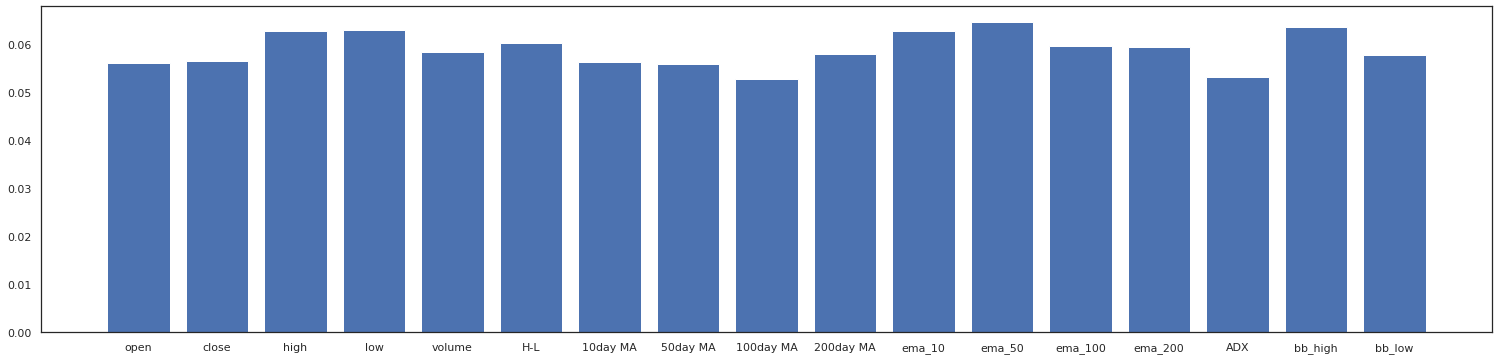

In [ ]:
fig = plt.figure(figsize=(26,6))
plt.xticks(rotation='horizontal')
plt.bar([i for i in range(len(model.feature_importances_))], model.feature_importances_.tolist(), 
        tick_label=test_x.columns)
plt.show()

In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
classifier=xgboost.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   38.7s finished



 Time taken: 0 hours 0 minutes and 39.63 seconds.


In [ ]:
x.head()

,open,close,high,low,volume,H-L,10day MA,50day MA,100day MA,200day MA,ema_10,ema_50,ema_100,ema_200,ADX,bb_high,bb_low
date,,,,,,,,,,,,,,,,,
2019-03-11,25208.00,25650.88,25661.63,25208.00,309792305,453.63,25734.517,26059.9660,26259.6169,26703.00995,25738.302589,26006.410582,26172.239116,26371.615343,16.109462,26487.192489,25296.791320
2019-03-08,25347.38,25450.24,25466.14,25252.46,270496061,213.68,25747.922,26057.4514,26255.8305,26686.92035,25685.927573,25984.593222,26157.686041,26361.045276,17.309831,26437.290068,25261.857551
2019-03-07,25645.45,25473.23,25645.45,25352.55,289144133,292.90,25742.714,26048.9096,26253.1555,26671.47935,25647.255287,25964.533800,26143.894599,26350.875688,17.374509,26350.959742,25257.544067
2019-03-06,25818.76,25673.46,25837.61,25633.71,256249895,203.90,25693.786,26044.7762,26243.0377,26656.53480,25652.019780,25953.115881,26134.418874,26343.127803,16.478817,26250.101404,25290.671930
2019-03-05,25829.07,25806.63,25877.15,25725.63,252263057,151.52,25686.565,26042.9654,26233.9381,26641.67580,25680.130729,25947.369760,26127.818636,26337.000766,15.463882,26185.166196,25316.416662


In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.2,
 'learning_rate': 0.15,
 'max_depth': 3,
 'min_child_weight': 3}

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.2, learning_rate=0.15,
       max_delta_step=0, max_depth=3, min_child_weight=3, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x,y,cv=5)

In [ ]:
score.mean()

0.4866606542539226

In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12411 entries, 2019-03-11 to 1970-01-02
Data columns (total 18 columns):
open          12411 non-null float64
close         12411 non-null float64
high          12411 non-null float64
low           12411 non-null float64
volume        12411 non-null int64
H-L           12411 non-null float64
10day MA      12411 non-null float64
50day MA      12411 non-null float64
100day MA     12411 non-null float64
200day MA     12411 non-null float64
ema_10        12411 non-null float64
ema_50        12411 non-null float64
ema_100       12411 non-null float64
ema_200       12411 non-null float64
ADX           12411 non-null float64
bb_high       12411 non-null float64
bb_low        12411 non-null float64
price_rise    12411 non-null int64
dtypes: float64(16), int64(2)
memory usage: 2.1 MB


In [ ]:
train_y = y['2012-12-31':'1970-01-02'] 
test_y  = y['2019-12-17':'2013-01-01'] 
print('Observations: %d' % (len(y)))
print('Train Dataset:',train_y.shape)
print('Test Dataset:', test_y.shape)

In [ ]:
train_data = x['2019-11-30':'1970-01-02']
test_data  = x['2019-12-01':]
print('Observations: %d' % (len(t)))
print('Train Dataset:',train_data.shape)
print('Test Dataset:', test_data.shape)

Observations: 12664
Train Dataset: (12411, 17)
Test Dataset: (12411, 17)


In [ ]:
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# split data into X and y
Y = t['price_rise']
X = t.drop(columns = ['price_rise'])

# CV model
mod = xgboost.XGBClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=7)
results = cross_val_score(mod, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 45.92% (5.16%)


In [5]:
dji = web.DataReader('^DJI', data_source = 'yahoo', start = '2000-01-01')
print(dji.head())
print('\n')
print(dji.shape)

                    High           Low          Open         Close     Volume     Adj Close
Date                                                                                       
2000-01-03  11522.009766  11305.690430  11501.849609  11357.509766  169750000  11357.509766
2000-01-04  11350.059570  10986.450195  11349.750000  10997.929688  178420000  10997.929688
2000-01-05  11215.099609  10938.669922  10989.370117  11122.650391  203190000  11122.650391
2000-01-06  11313.450195  11098.450195  11113.370117  11253.259766  176550000  11253.259766
2000-01-07  11528.139648  11239.919922  11247.059570  11522.559570  184900000  11522.559570


(5158, 6)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

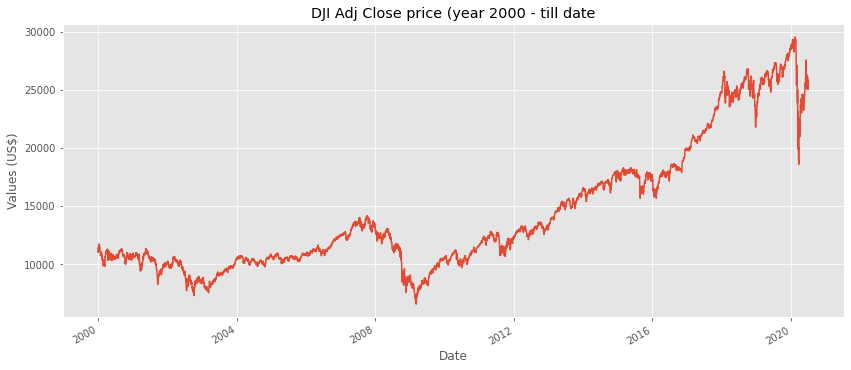

In [13]:
plt.rcParams['figure.figsize'] = [14,6]
dji_series = dji['Adj Close']
dji_series.plot()
plt.ylabel('Values (US$)')
plt.title('DJI Adj Close price (year 2000 - till date')
plt.show()

In [14]:
import math
import warnings
import numpy as np

# specify to ignore warning messages
warnings.filterwarnings("ignore") 

import keras
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [15]:
import pandas_datareader as pdr

from keras.layers import LSTM
from keras.models import Sequential
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Activation, Dropout

from sklearn.preprocessing import MinMaxScaler

In [16]:
# prepare training and testing data sets for LSTM based regression modeling
def get_reg_train_test(timeseries,sequence_length= 51,
                   train_size=0.9,roll_mean_window=5,
                   normalize=True,scale=False):
    # smoothen out series
    if roll_mean_window:
        timeseries = timeseries.rolling(roll_mean_window).mean().dropna()
    
    # create windows
    result = []
    for index in range(len(timeseries) - sequence_length):
        result.append(timeseries[index: index + sequence_length])
           
    
    # normalize data as a variation of 0th index
    if normalize:
        normalised_data = []
        for window in result:
            normalised_window = [((float(p) / float(window[0])) - 1) \
                                   for p in window]
            normalised_data.append(normalised_window)
        result = normalised_data
    
    # identify train-test splits
    result = np.array(result) 
    row = round(train_size * result.shape[0])
    
    # split train and test sets
    train = result[:int(row), :]
    test = result[int(row):, :]
    
    # scale data in 0-1 range
    scaler = None
    if scale:
        scaler=MinMaxScaler(feature_range=(0, 1))
        train = scaler.fit_transform(train)
        test = scaler.transform(test)
      
    # split independent and dependent variables  
    x_train = train[:, :-1]
    y_train = train[:, -1]
        
        
    x_test = test[:, :-1]
    y_test = test[:, -1]
    
    # Transforms for LSTM input
    x_train = np.reshape(x_train, (x_train.shape[0], 
                                   x_train.shape[1], 
                                   1))
    x_test = np.reshape(x_test, (x_test.shape[0], 
                                 x_test.shape[1], 
                                 1)) 
    
    return x_train,y_train,x_test,y_test,scaler   

In [17]:
# prepare training and testing data sets for LSTM based sequence modeling
def get_seq_train_test(time_series, scaling=True,train_size=0.9):
    scaler = None
    if scaling:
        scaler = MinMaxScaler(feature_range=(0, 1))
        time_series = np.array(time_series).reshape(-1,1)
        scaled_stock_series = scaler.fit_transform(time_series)
    else:
        scaled_stock_series = time_series
        
    train_size = int(len(scaled_stock_series) * train_size)

    train = scaled_stock_series[0:train_size]
    test = scaled_stock_series[train_size:len(scaled_stock_series)]
    
    return train,test,scaler 

In [19]:
# Get stacked LSTM model for regression modeling
def get_reg_model(layer_units=[100,100],dropouts=[0.2,0.2],window_size=50):
    # build LSTM network
    model = Sequential()
    
    # hidden layer 1
    model.add(LSTM(layer_units[0], 
                   input_shape=(window_size,1), 
                   return_sequences=True))
    model.add(Dropout(dropouts[0]))
    
    # hidden layer 2
    model.add(LSTM(layer_units[1]))
    model.add(Dropout(dropouts[1]))
    
    # output layer
    model.add(Dense(1))
    model.add(Activation("linear"))
    
    start = time.time()
    model.compile(loss="mse", optimizer="adam")
    print("> Compilation Time : ", time.time() - start)
    print(model.summary())
    return model


In [20]:
# Get stacked LSTM model for sequence modeling
def get_seq_model(hidden_units=4,input_shape=(1,1),verbose=False):
    # create and fit the LSTM network
    model = Sequential()
    # samples*timesteps*featuress

    model.add(LSTM(input_shape=input_shape, 
                   units = hidden_units, 
                   return_sequences=True
    ))
    
    # readout layer. TimeDistributedDense uses the same weights for all
    # time steps.
    model.add(TimeDistributed(Dense(1)))
    start = time.time()
    
    model.compile(loss="mse", optimizer="rmsprop")
    
    if verbose:
        print("> Compilation Time : ", time.time() - start)
        print(model.summary())
        
    return model

In [21]:
# Window wise prediction function
def predict_reg_multiple(model, data, window_size=6, prediction_len=3):
    prediction_list = []
    
    # loop for every sequence in the dataset
    for window in range(int(len(data)/prediction_len)):
        _seq = data[window*prediction_len]
        predicted = []
        # loop till required prediction length is achieved
        for j in range(prediction_len):
            predicted.append(model.predict(_seq[np.newaxis,:,:])[0,0])
            _seq = _seq[1:]
            _seq = np.insert(_seq, [window_size-1], predicted[-1], axis=0)
        prediction_list.append(predicted)
    return prediction_list

In [22]:
# Plot window wise 
def plot_reg_results(predicted_data, true_data, prediction_len=3):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    
    # plot actual data
    ax.plot(true_data, 
            label='True Data',
            c='black',alpha=0.3)
    
    # plot flattened data
    plt.plot(np.array(predicted_data).flatten(), 
             label='Prediction_full',
             c='g',linestyle='--')
    
    #plot each window in the prediction list
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction',c='black')

    plt.title("Forecast Plot with Prediction Window={}".format(prediction_len))
    plt.show()

In [ ]:
dataset.tail(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-02,26204.410156,25778.119141,25936.449219,25827.359375,349130000,25827.359375


In [26]:
from fbprophet import Prophet

# reset index to get date_time as a column
prophet = dji_series.reset_index()

# prepare the required dataframe
prophet.rename(columns={'Date':'ds','Adj Close':'y'},inplace=True)
prophet = prophet[['ds','y']]

In [59]:
train_percent = 0.90
# prepare train and test sets
train_size = int(prophet.shape[0]*train_percent)
train = prophet.iloc[:train_size]
test = prophet.iloc[train_size+1:]

In [40]:
test.tail()

,ds,y
5153,2020-06-26,25015.550781
5154,2020-06-29,25595.800781
5155,2020-06-30,25812.880859
5156,2020-07-01,25734.970703
5157,2020-07-02,25827.359375


In [60]:
# build a prophet model
model_prophet = Prophet()

In [61]:
# fit the model
model_prophet.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
test.shape[0]

515

In [63]:
# prepare a future dataframe
future_dates = model_prophet.make_future_dataframe(periods=test.shape[0])
# test.shape[0] = 515

# forecast values
forecast = model_prophet.predict(future_dates)

### Plot test prediction

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

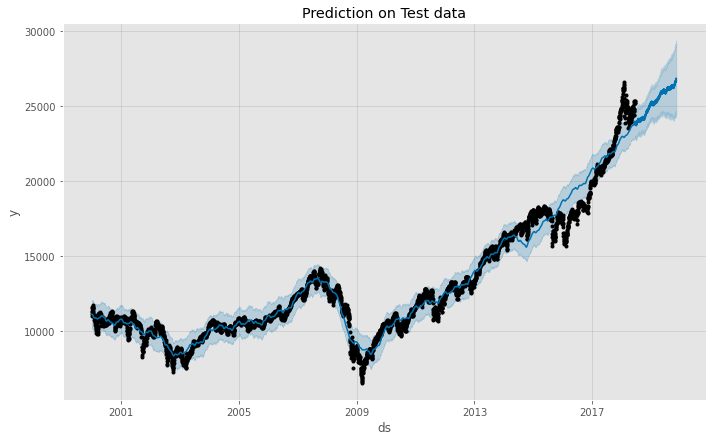

In [64]:
plt.rcParams['figure.figsize'] = [14,6]
model_prophet.plot(forecast)
plt.title('Prediction on Test data')
plt.show()

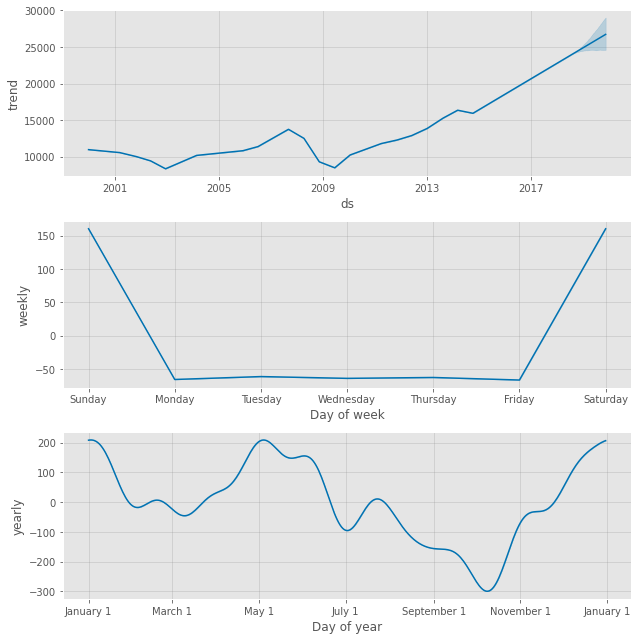

In [65]:
fig1 = model_prophet.plot_components(forecast)

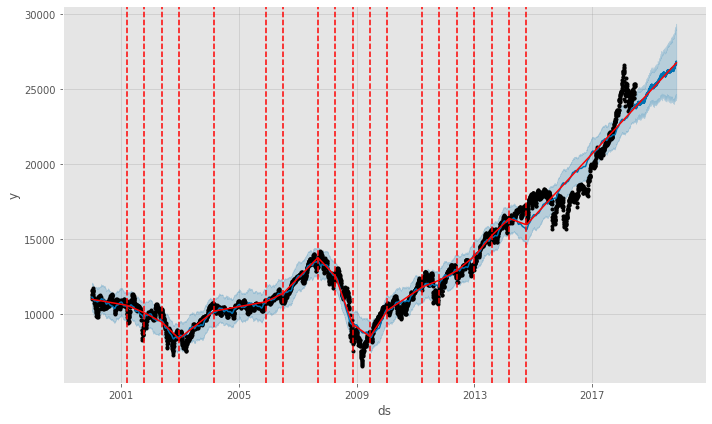

In [66]:
from fbprophet.plot import add_changepoints_to_plot
fig = model_prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_prophet, forecast)

In [67]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5152,2019-11-07,26706.634566,24396.069047,29057.982699,24601.298805,28992.651386,-101.608909,-101.608909,-101.608909,-62.755884,-62.755884,-62.755884,-38.853025,-38.853025,-38.853025,0.0,0.0,0.0,26605.025658
5153,2019-11-08,26712.431983,24410.755798,28995.554356,24602.346726,29001.432624,-102.905665,-102.905665,-102.905665,-66.581333,-66.581333,-66.581333,-36.324332,-36.324332,-36.324332,0.0,0.0,0.0,26609.526318
5154,2019-11-09,26718.229399,24644.009932,29337.572173,24603.394647,29010.213861,125.783702,125.783702,125.783702,160.278520,160.278520,160.278520,-34.494818,-34.494818,-34.494818,0.0,0.0,0.0,26844.013101
5155,2019-11-10,26724.026815,24656.646856,29354.265969,24604.442568,29021.209483,127.030309,127.030309,127.030309,160.278521,160.278521,160.278521,-33.248213,-33.248213,-33.248213,0.0,0.0,0.0,26851.057124
5156,2019-11-11,26729.824231,24367.621066,29089.590502,24605.490489,29033.456354,-98.210725,-98.210725,-98.210725,-65.752632,-65.752632,-65.752632,-32.458093,-32.458093,-32.458093,0.0,0.0,0.0,26631.613507


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

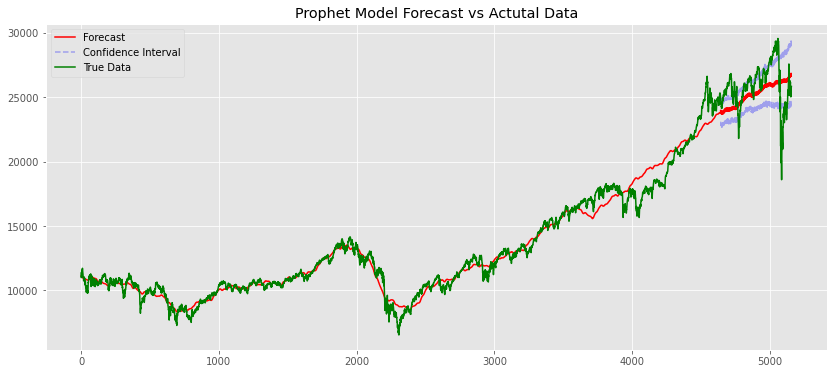

In [68]:
# the 1 sigma upper and lower analytic population bounds
lower_bound = (forecast.yhat_lower.iloc[train_size+1:])
upper_bound = (forecast.yhat_upper.iloc[train_size+1:])

# plot against true data
plt.plot(forecast['yhat'],c='r',label='Forecast')
plt.plot(lower_bound,
         linestyle='--',c='b',alpha=0.3,
         label='Confidence Interval')
plt.plot(upper_bound,
         linestyle='--',c='b',alpha=0.3)
plt.plot(prophet['y'],c='g',label='True Data')
plt.legend()
plt.title('Prophet Model Forecast vs Actutal Data')
plt.show()

In [70]:
x_train,y_train,x_test,y_test,scaler = get_reg_train_test(dji_series,
                                                      sequence_length=WINDOW+1,
                                                      roll_mean_window=None,
                                                      normalize=True,
                                                      scale=False)
    
print("Data Split Complete")

print("x_train shape={}".format(x_train.shape))
print("y_train shape={}".format(y_train.shape))
print("x_test shape={}".format(x_test.shape))
print("y_test shape={}".format(y_test.shape))

Data Split Complete
x_train shape=(4636, 6, 1)
y_train shape=(4636,)
x_test shape=(515, 6, 1)
y_test shape=(515,)


In [1]:
import itertools
import time

In [72]:
window = 6
pred_length = int(window/2)
stock_index = '^DJI'

# prepare LSTM model
stm_model=None
try:
    lstm_model = get_reg_model(layer_units=[50,100],window_size=window)   
except:
    print("Model Build Failed. Trying Again")
    lstm_model = get_reg_model(layer_units=[50,100],window_size=window)

> Compilation Time :  0.011904001235961914
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 6, 50)             10400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 50)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 70,901
Trainable params: 70,901
Non-trainable params: 0
_______

In [73]:
# use eatrly stopping to avoid overfitting     
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,verbose=0)]
lstm_model.fit(x_train, y_train, epochs=20, batch_size=16,verbose=1,validation_split=0.05,
               callbacks=callbacks)
print("Model Fit Complete")

Train on 4404 samples, validate on 232 samples
Epoch 1/20
4404/4404 [==============================] - 9s 2ms/step - loss: 3.0409e-04 - val_loss: 1.1142e-04
Epoch 2/20
4404/4404 [==============================] - 7s 1ms/step - loss: 1.7071e-04 - val_loss: 1.0512e-04
Epoch 3/20
4404/4404 [==============================] - 7s 1ms/step - loss: 1.5794e-04 - val_loss: 1.1398e-04
Epoch 4/20
4404/4404 [==============================] - 7s 2ms/step - loss: 1.5487e-04 - val_loss: 1.0658e-04
Model Fit Complete


In [75]:
# Train Prediction Performance
train_pred_seqs = predict_reg_multiple(lstm_model,x_train, window_size=window,prediction_len=pred_length)
train_offset = y_train.shape[0] - np.array(train_pred_seqs).flatten().shape[0]

train_rmse = math.sqrt(mean_squared_error(y_train[train_offset:], np.array(train_pred_seqs).flatten()))
print('Train Score: %.2f RMSE' % (train_rmse))

Train Score: 0.02 RMSE


In [76]:
# Test Prediction Performance
test_pred_seqs = \
predict_reg_multiple(lstm_model,x_test, window_size=window,prediction_len=pred_length)
test_offset = y_test.shape[0] - np.array(test_pred_seqs).flatten().shape[0]

test_rmse = \
math.sqrt(mean_squared_error(y_test[test_offset:], np.array(test_pred_seqs).flatten()))
print('Test Score: %.2f RMSE' % (test_rmse))

Test Score: 0.04 RMSE


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

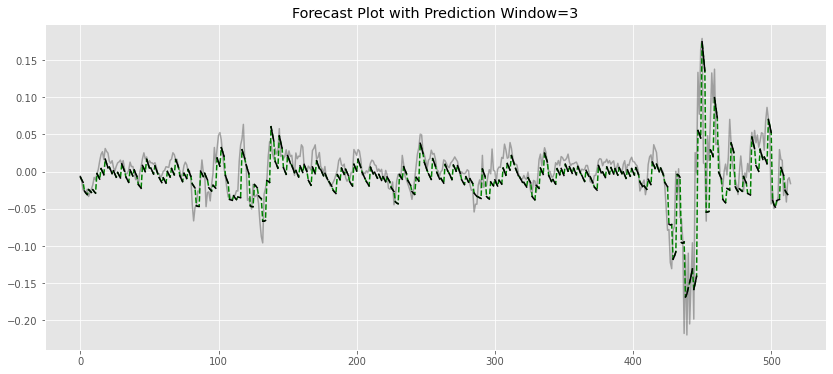

<IPython.core.display.Javascript object>

In [79]:
# Plot Test Predictions
plot_reg_results(test_pred_seqs,y_test,prediction_len=pred_length)
plt.show()

In [80]:
train_percent = 0.8
verbose=True

# split train and test datasets
train,test,scaler = \
get_seq_train_test(dji_series,scaling=True,train_size=train_percent)

train = np.reshape(train,(1,train.shape[0],1))
test = np.reshape(test,(1,test.shape[0],1))

train_x = train[:,:-1,:]
train_y = train[:,1:,:]

test_x = test[:,:-1,:]
test_y = test[:,1:,:]

print("Data Split Complete")

print("train_x shape={}".format(train_x.shape))
print("train_y shape={}".format(train_y.shape))
print("test_x shape={}".format(test_x.shape))
print("test_y shape={}".format(test_y.shape))

Data Split Complete
train_x shape=(1, 4125, 1)
train_y shape=(1, 4125, 1)
test_x shape=(1, 1031, 1)
test_y shape=(1, 1031, 1)


In [81]:
# build RNN model
seq_lstm_model=None
try:
    seq_lstm_model = get_seq_model(input_shape=(train_x.shape[1],1),verbose=verbose)   
except:
    print("Model Build Failed. Trying Again")
    seq_lstm_model = get_seq_model(input_shape=(train_x.shape[1],1),verbose=verbose)

> Compilation Time :  0.17194294929504395
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 4125, 4)           96        
_________________________________________________________________
time_distributed_1 (TimeDist (None, 4125, 1)           5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# train the model
seq_lstm_model.fit(train_x, train_y, epochs=50, batch_size=1, verbose=2)
print("Model Fit Complete")

Epoch 1/50
 - 6s - loss: 0.1246
Epoch 2/50
 - 6s - loss: 0.1179
Epoch 3/50
 - 6s - loss: 0.1134
Epoch 4/50
 - 6s - loss: 0.1098
Epoch 5/50
 - 6s - loss: 0.1067
Epoch 6/50
 - 6s - loss: 0.1040
Epoch 7/50
 - 6s - loss: 0.1015
Epoch 8/50
 - 6s - loss: 0.0993
Epoch 9/50
 - 6s - loss: 0.0971
Epoch 10/50
 - 6s - loss: 0.0951
Epoch 11/50
 - 6s - loss: 0.0932
Epoch 12/50
 - 6s - loss: 0.0914
Epoch 13/50
 - 6s - loss: 0.0897
Epoch 14/50
 - 6s - loss: 0.0880
Epoch 15/50
 - 6s - loss: 0.0864
Epoch 16/50
 - 6s - loss: 0.0848
Epoch 17/50
 - 6s - loss: 0.0832
Epoch 18/50
 - 6s - loss: 0.0817
Epoch 19/50
 - 6s - loss: 0.0802
Epoch 20/50
 - 6s - loss: 0.0788
Epoch 21/50
 - 6s - loss: 0.0774
Epoch 22/50
 - 6s - loss: 0.0760
Epoch 23/50
 - 6s - loss: 0.0746
Epoch 24/50


In [ ]:
# train fit performance
trainPredict = seq_lstm_model.predict(train_x)
trainScore = math.sqrt(mean_squared_error(train_y[0], trainPredict[0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 0.18 RMSE


In [ ]:
from keras.preprocessing.sequence import pad_sequences

# Pad input sequence
testPredict = pad_sequences(test_x,
                                maxlen=train_x.shape[1],
                                padding='post',
                                dtype='float64')

In [ ]:
# forecast values
testPredict = seq_lstm_model.predict(testPredict)

# evaluate performances
testScore = math.sqrt(mean_squared_error(test_y[0], 
                                         testPredict[0][:test_x.shape[1]]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 0.78 RMSE


In [ ]:
pd.DataFrame(trainPredict)

<IPython.core.display.Javascript object>

,0
0,4.027450e+12
1,4.006323e+12
2,4.007364e+12
3,4.018545e+12
4,4.022119e+12
...,...
3604,3.191925e+12
3605,3.191455e+12
3606,3.200556e+12
3607,3.197973e+12


In [ ]:
# inverse transformation
trainPredict = scaler.inverse_transform(trainPredict.reshape(-1,1))
testPredict = scaler.inverse_transform(testPredict.reshape(-1,1))

In [ ]:
dji_close_series.index[1:train_size]

DatetimeIndex(['2000-01-04'], dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
pd.DataFrame(trainPredict, index = dji_close_series.index[1:train_size])

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446,3447,3448,3449,3450,3451,3452,3453,3454,3455,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3510,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3541,3542,3543,3544,3545,3546,3547,3548,3549,3550,3551,3552,3553,3554,3555,3556,3557,3558,3559,3560,3561,3562,3563,3564,3565,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575,3576,3577,3578,3579,3580,3581,3582,3583,3584,3585,3586,3587,3588,3589,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599,3600,3601,3602,3603,3604,3605,3606,3607,3608
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-04,175073248.0,174154848.0,174200128.0,174686144.0,174841536.0,175333552.0,176289648.0,177126544.0,177833440.0,178026208.0,178829392.0,179686944.0,180783488.0,181882832.0,183448512.0,184410688.0,185039152.0,185456880.0,186681568.0,186778576.0,186503488.0,186429184.0,186324800.0,186412512.0,186656304.0,186639792.0,187495168.0,188229696.0,189446000.0,189912112.0,189549264.0,189823136.0,190130912.0,191313088.0,191782544.0,192355872.0,193160800.0,194446256.0,194671120.0,194508304.0,194345328.0,194125120.0,193289328.0,193398272.0,194718128.0,195377008.0,195303392.0,195528560.0,195597536.0,196092480.0,195328608.0,193164768.0,191862608.0,190713440.0,189222512.0,188408736.0,187058496.0,186236272.0,186012800.0,186196368.0,186073360.0,186151152.0,186411200.0,185593392.0,185264880.0,185480032.0,185355776.0,185297072.0,185012048.0,184496944.0,184702720.0,185506480.0,188111440.0,188874192.0,188774384.0,188999120.0,188545600.0,188027408.0,186941616.0,186823888.0,186926384.0,187518560.0,187652672.0,188023120.0,189104240.0,190031280.0,190082160.0,190025040.0,190192112.0,190850560.0,190669744.0,190340176.0,189449952.0,188441056.0,188326224.0,188223376.0,188675216.0,189262432.0,190061696.0,190208864.0,191018816.0,191614928.0,191234640.0,190996688.0,190386608.0,189504992.0,188856032.0,188696224.0,188339872.0,188604816.0,188968272.0,189386

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

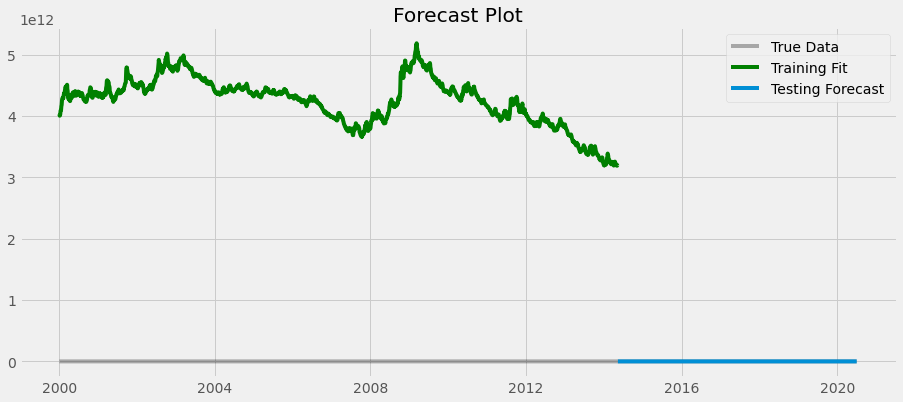

In [ ]:
# plot the true and forecasted values
train_size = len(trainPredict)+1

plt.plot(sp_close_series.index,
         sp_close_series.values,c='black',
         alpha=0.3,label='True Data')
plt.plot(sp_close_series.index[1:train_size],
         trainPredict,label='Training Fit',c='g')
plt.plot(sp_close_series.index[train_size+1:],
         testPredict[:test_x.shape[1]],label='Testing Forecast')
plt.title('Forecast Plot')
plt.legend()
plt.show()
